In [14]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('water-training.csv')
test_df = df.select_dtypes(include=["number"]).dropna()

K-means: known number of clusters, linear

In [15]:
# Specifying the number of clusters (k)
kmeans = KMeans(n_clusters=2)
kmeans.fit(test_df)

# Getting the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

test_df['cluster'] = labels

c:\Users\vince\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DBSCaN: handle noise and outliers

In [ ]:
from sklearn.cluster import DBSCAN

# Sample data
data = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

SCORING

In [19]:
score = silhouette_score(test_df, labels) #measure of similarity -1 (incorrect clustering) to 1 
db_index = davies_bouldin_score(test_df, labels) #measure of similarity 0 (incorrect clustering) to 1
ch_index = calinski_harabasz_score(test_df, labels) #the higher the better

score, db_index, ch_index

(0.44801450649578006, 0.8622515989037304, 49.68286712807221)

REPRESENTaTION

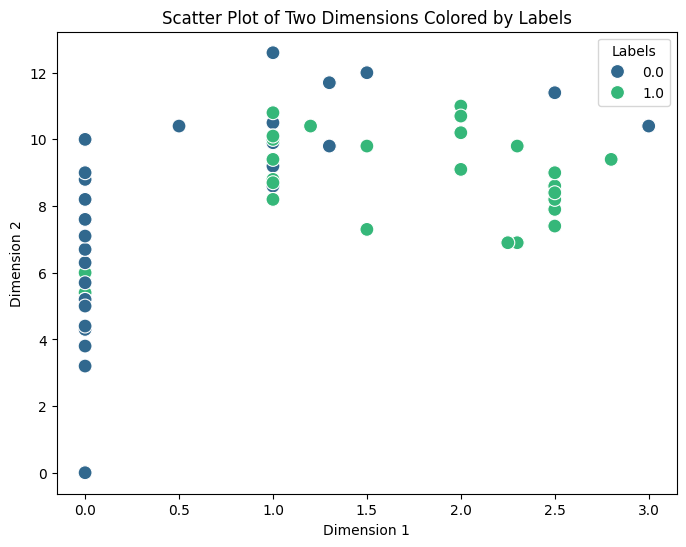

In [34]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Salinity (ppt)', y='Dissolved Oxygen (mg/L)', hue=test_df.cluster, palette='viridis', s=100)  # s is the size of markers

# Add labels and title
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot of Two Dimensions Colored by Labels')
plt.legend(title='Labels')

# Show the plot
plt.show()